In [1]:
import warnings
warnings.simplefilter("ignore")

# change cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# ML module
import sklearn
from sklearn.model_selection import train_test_split ## splite data into train data and validation data
from sklearn.preprocessing import StandardScaler     
from sklearn.metrics import r2_score                 
from sklearn.metrics import mean_squared_error

In [4]:
import random as rn
import tensorflow as tf
def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    rn.seed(seed) # random関数のシードを固定
    np.random.seed(seed) # numpyのシードを固定
    tf.random.set_seed(seed) # tensorflowのシードを固定

In [5]:
reset_seed(1234)

In [6]:
import tensorflow as tf

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

### TOKI Comment
- df_raw.reset_index を行う理由は何か？　データを見える化ではタイムスタンプを使用するので、本処理は行わない  
(Why did you do "df_raw.reset_index"? Since the time stamp is used for visualizing the data, this process is not required.)

In [7]:
#data_dir = '../../../MonitoringAI_CPW/DataForFSI4135'
data_dir = r'..\..\..\DataForFSI4135'
data_filelist = os.listdir(data_dir)
file_num = len(data_filelist)
print("file_num:",file_num)
print(data_filelist)

# Read Data and Integrate into 1 Data Frame
df_raw = pd.DataFrame()
for i_file in range(file_num):
    file_dir = data_dir + "/" + data_filelist[i_file]
    print(file_dir)
    df_tmp = pd.read_pickle(file_dir)
    df_raw = pd.concat([df_raw, df_tmp])
#df_raw.reset_index(drop=True, inplace=True)
print("df_raw.shape:", df_raw.shape)

### TOKI Message to CPW members
- I don't know the pandas method '.describe'. This method is very convinient. I appreciate for your information.

In [8]:
df_raw.describe()

In [9]:
df = df_raw.copy()
df.dropna(inplace=True)
#df.reset_index(inplace=True, drop=True)

In [10]:
df.shape

In [11]:
# explanatory variable - given
list_x = [
    'LC_4103.PV',
    'LC_4105.PV',
    'LC_4105.OP',
    'PC_4108.PV',
    'LC_4109.PV',
    'TI_4128.PV',
    'FI_4118.PV',
    'TI_4132.PV',
    'TI_4131.PV',
    'LC_4119.PV',
    'FI_4120.PV',
    'LC_4120.PV',
    'TI_4134.PV',
    'TI_4190.PV',
    'PC_4111.PV',
    'TI_4152.PV',
    'TI_4164.PV',
    'TI_4159.PV',
    'TI_4163.PV',
    'TI_4136.PV',
    'TC_4120.PV',
    'TI_4162.PV',
    'TI_4139.PV',
    'PC_4120.PV',
    'PC_4114.PV',
    'FC_4121.PV',
    'FC_4122.PV',
    'FC_4123.PV',
    'FC_4124.PV',
    'TC_4121.PV',
    'TI_4142.PV',
    'TI_4180.PV',
    'TC_4158.PV',
    'FC_4138.PV',
    'TI_4147.PV',
    'FC_4137.PV',
    'PC_4112.PV',
    'LC_4123.PV',
    'FC_4126.PV',
    'LC_4122.PV',
    'PI_4128.PV',
    'TI_4145.PV',
    'LC_4124.PV',
    'LC_4125.PV',
    'FC_4132.PV',
    'FSI4170.PV',
    'TI_4150.PV',
    'LC_4122.OP',
    'TI_4101.PV',
    'FI_4117.PV',
    'LC_4101.PV',
    'LC_4101.OP',
    'TI_4102.PV',
    'FSI4101.PV',
    'PC_4102.PV',
    'LIX41022.PV',
    'AI_41021.PV',
    'TI_4151.PV',
    'PQ_62003.PV',
    'PQ_62004.PV',
    'FC_61001.PV',
    'HC_4113.OP',
    'TI_4191.PV'
]

# Target variable
list_y = [
    'FSI4135.PV' 
]

In [12]:
# # 90% of Data shall be Train, 10% of data shall be trial
# Total_Data = df.shape[0]
# print('Total Data 100%: ', Total_Data)
# Train_Data = Total_Data * 0.9
# Train_Data = int(Train_Data)
# print('Train Data 90%:  ', Train_Data)
# Trial_Data = Total_Data - Train_Data
# print('Trial Data 10%:  ', Trial_Data)

In [13]:
df_train, df_trial = train_test_split(df, test_size=0.1, random_state=0)

In [14]:
# Add by TOKI
train_index, trial_index = df_train.index, df_trial.index
print('** train = {} / trial = {}'.format(len(train_index),len(trial_index)))

In [15]:
#df_train

In [16]:
#df_train.reset_index(inplace=True, drop=True)

In [17]:
df_train

In [18]:
#df_trial

In [19]:
#df_trial.reset_index(inplace=True, drop=True)

In [20]:
df_trial

In [21]:
# train and validation data
df_X = df_train[list_x] # Feature
df_y = df_train.loc[:,list_y] # Target

In [22]:
# trial data
df_X_trial = df_trial[list_x] # Feature
df_y_trial = df_trial.loc[:,list_y] # target

# Standalize Data

In [23]:
# standalize train and validation data (X & y)
sc_X_train = StandardScaler()
sc_y_train = StandardScaler()

In [24]:
train_X_std = sc_X_train.fit_transform(df_X.values)
train_y_std = sc_y_train.fit_transform(df_y.values.reshape(-1,1))

In [25]:
trial_X_std = sc_X_train.transform(df_X_trial.values)
trial_y_std = sc_y_train.transform(df_y_trial.values.reshape(-1, 1))

### TOKI Comment : Visualize Training Data

- 異常値、外れ値の検知、test data 期間検討、データ変動、データの分布の理解の為にも、データを見える化すべし！  
(Data should be visualized for 1_detection of outliers and unusual values, 2_consideration of test data period, 3_detection of data fluctuation, and 4_understanding of data distribution)
- 異常値、外れ値の検知 : 大きさ順に並べると仲間外れ値が見えてくる！ : like RobsutScaler  
(For outliers and unusual value detection: Outliers can be seen by arranging them in order of size. Consider using Robsut Scaler which is resistant to outliers.)

In [26]:
col_y = df_y.columns.tolist()
col_x = df_X.columns.tolist()
print(col_y)
print(col_x)

In [27]:
import math
from sklearn.preprocessing import MinMaxScaler

plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.rcParams['legend.facecolor'] = 'lightgoldenrodyellow'
plt.rcParams['grid.color'] = 'white'


def create_multi_axis_free(block_fig_size, n_block, axis_margin):
    
    # block で指定したサイズのaxisを複数生成
    
    figsize_x_max = 18
    margin_x, margin_y = axis_margin[0], axis_margin[1]
    n_block_x, n_y = n_block[0], n_block[1]
    n_axis_block = len(block_fig_size)    

    # create axis 4 corner positions in block
    axis_in_block = []
    bottom_,left_, height_max = margin_y, margin_x, 0  
    for k in range(n_axis_block):
        width_, height_ = block_fig_size[k][0],block_fig_size[k][1]
        axis_corner = [left_,bottom_,width_, height_]
        axis_in_block.append(axis_corner)
        height_max = max(height_max, height_)
        left_ += (margin_x+width_)
    block_sizeX, block_sizeY = left_+margin_x,height_max+margin_y
    
    axis_pos_lst = []
    for i in range(n_y):
        add_bottom = block_sizeY*i
        for j in range(n_block_x):
            add_left = block_sizeX*j
            for k in range(n_axis_block): # X方向に継ぎ足し
                lst = axis_in_block[k]
                axis_corner = [lst[0]+add_left,lst[1]+add_bottom,lst[2],lst[3]]
                axis_pos_lst.append(axis_corner)
    last_axis = axis_pos_lst[-1]
    fig_sizeX = last_axis[0]+last_axis[2]+margin_x
    fig_sizeY = last_axis[1]+last_axis[3]+margin_y
    figx = min(figsize_x_max,fig_sizeX)
    figy = fig_sizeY*figx/fig_sizeX
    
    axis_lst = []
    fig = plt.figure(figsize = (figx,figy))
    # print(fig.get_size_inches())
    for i in range(len(axis_pos_lst)):
        axis_ = axis_pos_lst[i]
        # print('* axis before adjust [left_,bottom_,width_, height_] : ',axis_)
        axis_ = [axis_[0]/fig_sizeX, 1 - axis_[1]/fig_sizeY, axis_[2]/fig_sizeX, axis_[3]/fig_sizeY]
        # print('* axis after adjust [left_,bottom_,width_, height_] : ',axis_)
        ax_ = plt.axes(axis_)
        axis_lst.append(ax_)

    del axis_in_block,axis_pos_lst
    
    return fig, axis_lst


def visualize_trend_histgram_sigle(df,ax1,ax2,color_,draw_type='scatter',hist_bins=50):
    
    if (draw_type=='scatter'):
        ax1.scatter(df.index,df,s=s_size,color=color_)
    elif (draw_type=='plot'):
        ax1.plot(df.index,df_plot_data,linewidth=2,color=color_)
    ax1.grid(True)
    ax1.set_xlabel('datetime')
    ax2.hist(df.iloc[:,0],bins=hist_bins,orientation='horizontal', color=color_)
    ax2.grid(True)

    return ax1, ax2

# def : =================================================


# Visualize Data
scaler_taget = MinMaxScaler().fit(np.concatenate([train_y_std, trial_y_std]))
scaler_feature = MinMaxScaler().fit(np.concatenate([train_X_std, trial_X_std]))
s_size = 10
for i in range(2):
    # i=0 : target,  i=1 : feature
    if (i==0): # Target
        train_, trial_, col = train_y_std, trial_y_std, df_y.columns.tolist()
        scaler_ = scaler_taget
    else:
        train_, trial_, col = train_X_std, trial_X_std, df_X.columns.tolist()
        scaler_ = scaler_feature
    n_plot = len(col)
    for j in range(n_plot):
        col_ = col[j]
        min_, max_ = scaler_.data_min_[j], scaler_.data_max_[j]
        print('===== {} : [{:.3f} - {:.3f}] ====='.format(col_,min_,max_))
        min_ = min_ - (max_ - min_)*0.1
        max_ = max_ + (max_ - min_)*0.1
        y_range = [min_, max_]
        fig, axis_lst = create_multi_axis_free([[10,1],[3,1]],[1,2],[0.5,0])
        for k in range(2): # k=0 : train,  k=1 : trial
            if (k==0):
                y_, index_, color_, label_, s_ = train_[:,j], train_index, 'teal', 'train', 5
            else:
                y_, index_, color_, label_, s_ = trial_[:,j], trial_index, 'firebrick', 'trial', 5
            
            axis_trend = axis_lst[2*k] # for history
            axis_trend.scatter(index_,y_,s=s_,color=color_,label=label_)
            axis_trend.grid(True)
            axis_trend.legend(loc='best')
            axis_trend.set_ylim(y_range)
            if (k==0):
                axis_trend.set_title(col_)
            elif (k==1):
                axis_trend.set_xlabel('datetime')
            axis_hist = axis_lst[2*k+1] # for histogram
            axis_hist.hist(y_,bins=100,range=y_range,orientation='horizontal',color=color_,label=label_)
            axis_hist.grid(True)
        plt.show()
    
del scaler_taget, scaler_feature
    
    
print('===== Check Outlier Feature Samples =====')
df_x_out = df.loc[:,list_x]
(n_row,n_col) = df_x_out.shape
n_axis_x, axis_size, color_ = 10, 1.5, 'firebrick'
n_axis_y = math.ceil(n_col/n_axis_x)
fig = plt.figure(figsize=((axis_size+0.25)*n_axis_x,(axis_size+0.5)*n_axis_y))
np_x = np.arange(0,n_row,1)
for i in range(n_col):
    plot_, col_ = df_x_out.iloc[:,i].sort_values(),df_x_out.columns[i]
    axis = plt.subplot(n_axis_y,n_axis_x,i+1)
    axis.scatter(np_x,plot_,s=5,color=color_)
    axis.grid(True)
    #axis.set_xlabel('order')
    #axis.set_ylabel('value')
    axis.set_title(col_)
    axis.tick_params(labelleft=False,labelbottom=False)
plt.show()

### TOKI Comment

- 以下に外れ値/異常値らしきもの有り！  
(There are some outliers / abnormal values below)
    - TI_4102.PV, PC_41202.PV, LIX41022.PV, PQ_62003.PV

In [28]:
lst_outliner_susTag = ['TI_4102.PV', 'PC_41202.PV', 'LIX41022.PV', 'PQ_62003.PV']

# Execute Neural Net Learning

In [29]:
#　Neural Net Module
import keras
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.compat.v1.keras import backend as K
from keras.models import Sequential      ## Set NN model
from keras.layers import Dense, Dropout  ## Set Dense
from keras.optimizers import Adam        ## Set Optimization
from keras import regularizers           ## Set Regularizer

In [30]:
# # fix randomness
# os.environ['PYTHONHASHSEED'] = '0'
# np.random.seed(0)
# rn.seed(0)

# session_conf = tf.compat.v1.ConfigProto(
#     intra_op_parallelism_threads=1,
#     inter_op_parallelism_threads=1
# )

# ###　Keras,tensorflow　###
# tf.compat.v1.set_random_seed(0)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# tf.compat.v1.keras.backend.set_session(sess)
# ###　Keras,tensorflow　###

In [31]:
x_input_shape = df_X.shape[1]
print('x_input_shape:', x_input_shape)
y_output_shape = df_y.shape[1]
print('y_output_shape:', y_output_shape)

## TOKI Comment

- 隠れ層、ノード数も多い。dropout/regulation/BathNormalize 無しで何故 overfitting しないのか？ (There are many hidden layers and nodes. Why not overfitting without dropout / regulation / BathNormalize?)
    - train と validation がランダム選出である為と推察 (It is presumed to be because train and validation are randomly selected)
- スパース化しないのにこれだけの量のノードが必要か？ (Do you need this many nodes to not sparse?)
- model.add(LeakyReLU(alpha=0.3)) : LeakyReLUを採用した理由？ ReLU との比較した結果？ (Why did you choose LeakyReLU? Do you have the result of comparison with ReLU?)

In [32]:
###　Keras　###
# construct NN
def build_model():
    model = Sequential() ## Set NN model
    
    model.add(Dense(units=200, input_shape=(63,)))
#     model.add(Dropout(0.1))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dense(units=400))
#     model.add(Dropout(0.1))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dense(units=700))
#     model.add(Dropout(0.1))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dense(units=400))
#     model.add(Dropout(0.1))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dense(units=200))
#     model.add(Dropout(0.1))
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dense(units=50))
#     model.add(Dropout(0.1))
    model.add(LeakyReLU(alpha=0.3))
    
    model.add(Dense(units=1)) ## units = Target number
    model.compile(optimizer='adam', loss='mean_squared_error') ## set laerning process
    model.summary()
    return model

In [33]:
# ###　Keras　###
# # construct NN
# def build_model():
#     model = Sequential() ## Set NN model
#     model.add(Dense(units=300, activation='relu', input_shape=(63,), kernel_regularizer=regularizers.l2(0.01))) ## Set Fully connected layer. input = Feature number
#     model.add(Dropout(0.3)) ## Set dropout
#     model.add(Dense(units=150, activation='relu', kernel_regularizer=regularizers.l2(0.01))) ## Set Fully connected layer
#     model.add(Dropout(0.3)) ## Set dropout
#     model.add(Dense(units=75, activation='relu', kernel_regularizer=regularizers.l2(0.01))) ## Set Fully connected layer
#     model.add(Dropout(0.3)) ## Set dropout
#     model.add(Dense(units=1)) ## units = Target number
#     model.compile(optimizer='adam', loss='mean_squared_error') ## set laerning process
#     return model
# ###　Keras　###

# Cross Validation K-fold

### TOKI Comment
- early_stopping を使用しなかった理由は何か？: 指定 epoch 終了時が最大性能とは限らない (Why didn't you use early_stopping? : The end of the specified epoch is not always the maximum performance.)
    - > 学習曲線を見ると、early_stopping は早い段階で作動して終了してしまっただろうと推察される。しかし、patience に大きな値を設定すれば回避できたかも...  
     (Looking at the learning curve, it is inferred that early_stopping would have activated and ended early. However, it could have been avoided by setting a large value for patience ...)
- 'train_score vs validation_score'に、'trial' を加えたい：同じサンプル（どのモデルも訓練に未使用かつ共通）での精度比較の為
  (Add'trial'to'train_score vs validation_score': for accuracy comparison in the same sample (all models are unused and common for training))
    - train, validation, trial のいずれのセットでも、model-id = 3 が最も高成績 => アンサンブルよりもこれ単体の方がよいかも？ 
      (In any set of train/validation/trial, model-id = 3 is the highest grade => This alone may better than the ensemble.)
- def 内で、early_stopping 未使用を決めつけずに、引数で採用か否か(early_stopping=None or =[...])を受けて処理する方が汎用に使える関数となる  
  (In def of function, receiving early_stopping = None or = [...] as an argument to make the function more general.)

In [34]:
from sklearn.model_selection import KFold
# from keras.callbacks import EarlyStopping

In [35]:
# def NN_cross_validate(train_X, train_y, n_splits, epoch, kf_shuffle=True,\
#                       early_stopping = EarlyStopping(monitor='val_loss', min_delta=-0.0001, patience=3, verbose=0, mode='auto')):
    
def NN_cross_validate(train_X, train_y, n_splits, epoch, kf_shuffle=True, trial=None):
    
    kf = KFold(n_splits=n_splits, shuffle=kf_shuffle)

    models, train_scores, validation_scores = [],[],[]
    
    # Add by TOKI =====
    trial_scores = []
    if (trial is None):
        trial_exists = False
    else:
        trial_exists = True
        trial_X, trial_y = trial[0], trial[1]
    # Add by TOKI =====
    
    # Add by TOKI =====
    model_id = 0
    # Add by TOKI =====

    for train_index, val_index in kf.split(train_X,train_y):
        
        # Add by TOKI =====
        model_id += 1
        print('\n# Training : Cross-Validation Model ID = {}\n'.format(model_id))
        # Add by TOKI =====

        train_data=train_X[train_index]
        train_label=train_y[train_index]
        val_data=train_X[val_index]
        val_label=train_y_std[val_index]

        model=build_model()
        history=model.fit(train_data,
                          train_label,
                          epochs=epoch,
                          batch_size=128,
                          validation_data=(val_data,val_label),
#                           callbacks=[early_stopping],
                          # verbose = 1 ## not show learning log
                          verbose = 0
                         )

        models.append(model)

        loss=history.history['loss']
        val_loss=history.history['val_loss']

        # visualize learning curve
        x = history.epoch
        plt.plot(x, loss, label="loss")
        plt.plot(x, val_loss, label="val_loss")
        plt.title("Learning Curve")
        plt.legend(loc='best')
        plt.xlabel("epoch")
        plt.ylabel("MSE")
        plt.grid()
        plt.show()

        """ ### TOKI Comment : 同じ計算 (r2_score(y_true=train_label,...)を2回行っていて計算時間のロス
        pred_train_y_std = model.predict(train_data) ## predict target value by stadalized train data   
        print('R^2 train_std: %.3f' % r2_score(y_true=train_label, \
                                               y_pred=pred_train_y_std, multioutput='raw_values'))

        pred_val_y_std = model.predict(val_data) ## predict target value by stadalized validation data
        print('R^2 val_std: %.3f' % r2_score(y_true=val_label, \
                                             y_pred=pred_val_y_std, multioutput='raw_values'))
        """
        
        pred_train_y_std = model.predict(train_data) ## predict target value by stadalized train data 
        train_score = r2_score(y_true=train_label, y_pred=pred_train_y_std, multioutput='raw_values')
        print('R^2 train_std: %.3f' % train_score)
        train_scores.append(train_score)
        
        pred_val_y_std = model.predict(val_data) ## predict target value by stadalized validation data
        validation_score= r2_score(y_true=val_label, y_pred=pred_val_y_std, multioutput='raw_values') 
        print('R^2 val_std: %.3f' % validation_score)
        validation_scores.append(validation_score)
        
        # Add by TOKI =====
        if (trial_exists):
            pred_trial_y_std = model.predict(trial_X)
            trial_score = r2_score(y_true=trial_y, y_pred=pred_trial_y_std, multioutput='raw_values')
            trial_scores.append(trial_score)
        # Add by TOKI =====


    fig, ax1 = plt.subplots(figsize=(3, 3))
    x = list(range(len(models)))

    ax1.plot(x, train_scores,"-",label="train_scores", lw=1, marker='o', markersize=2, markeredgewidth=4) 
    ax1.plot(x, validation_scores,"-",label="validation_scores", alpha=0.8, lw=1, marker='o', markersize=2, markeredgewidth=4)
    
    # Add by TOKI =====
    if (trial_exists):
        ax1.plot(x, trial_scores,"-",label="trial_scores", alpha=0.8, lw=1.5, marker='o', \
                 markersize=2, markeredgewidth=4)

    #ax1.set_title('train_score vs validation_score')
    ax1.set_title('R2 Score of Model')
    ax1.set_xlabel('Various Data')
    ax1.set_ylabel('score')
    ax1.legend(loc='lower left', bbox_to_anchor=(1, 0))
    ax1.grid() ## Grid

    plt.show()
    return models

### TOKI Comment
- 処理時間短縮の為、epoch を小さくしてラン  
  (-In order to shorten the processing time, make epoch smaller and run)

In [39]:
#epoch = 1000
#epoch, n_k = 10, 4
epoch, n_k = 50, 4
models = NN_cross_validate(train_X_std, train_y_std, n_k, epoch, trial=[trial_X_std, trial_y_std])

In [40]:
# output ensemble mean value from rach models developed by cross-validation
def def_pred_ensemble(model, df_trial):
    sum_predictedValue = 0
    for i in range(len(model)):
        sum_predictedValue = sum_predictedValue + model[i].predict(df_trial)

    pred_ensemble = sum_predictedValue/len(model)
    return pred_ensemble

In [41]:
pred_ensemble = def_pred_ensemble(models, trial_X_std)
pred_ensemble

### TOKI Comment
- def_score_ensemble 定義内の 'model', 'models' が指しているのは同じもの。名称を 'model' に統一のこと！  
  (def_score_ensemble'model' and'models' in the definition point to the same thing. Unify the name to'model')
- R2 Score, RMSE 数値表示に加え、Y軸×2　の plot 表示を推奨 > いずれが最もよいか数値を見なくても一目瞭然  
  (In addition to numerical value visualization (R2 Score, RMSE), it is recommended to display the plot of Y axis x 2> It is clear at a glance which is the best without looking at the numerical value)

In [43]:
def def_score_ensemble(model, df_trial_X, df_trial_y, target_unit): #(models, standarized_X, standarized_y)
    for i in range(len(models)):
        pred_train_y_std = models[i].predict(df_trial_X) ## predict target value by stadalized trial data
        print('R2 score_{}: %.3f'.format(i) % r2_score(y_true=df_trial_y,\
                                          y_pred=pred_train_y_std,\
                                          multioutput='raw_values'))        
        
        pred_train_y_inv = sc_y_train.inverse_transform(X=pred_train_y_std) ## inverse transform to before-standarized-pred_train_y
        true_train_y_inv = sc_y_train.inverse_transform(X=df_trial_y) ## inverse transform to before-standarized-pred_true_y       
        print('RMSE[{}]: %.3f'.format(target_unit) % np.sqrt(mean_squared_error(true_train_y_inv, pred_train_y_inv)))   
    
    # get ensmble score
    pred_ensemble = def_pred_ensemble(model, df_trial_X)
    train_score = r2_score(y_true = df_trial_y, \
                           y_pred = pred_ensemble,\
                           multioutput='raw_values')
    print('ensemble score: %.3f' %train_score)
    
    pred_train_y_inv = sc_y_train.inverse_transform(X=pred_ensemble)
    print('ensemble RMSE[{}]: %.3f'.format(target_unit) % np.sqrt(mean_squared_error(true_train_y_inv, pred_train_y_inv)))
    return 

## TOKI Comment
- アンサンブル（平均）は、model_id = 2 単体と同じスコア => どちらを採用するか？  
  (Since the ensemble (average) and model_id = 2 single are same score. => Which one should be adopted?)

In [44]:
print("R2 Score for Trial Dataset")
score_predictedEnsemble = def_score_ensemble(models, trial_X_std, trial_y_std.reshape(-1,1), "m3/h")

In [45]:
select_model_id = -1 # selecet model_id you want to use. put "-1" if you want to use ensmble model

def calc_pred(models,select_model_id,df_x): # switch procedure depends on 1model or ensmble model
    if (select_model_id<0):
        pred_ = def_pred_ensemble(models,df_x)
    else:
        pred_ = models[select_model_id].predict(df_x)
    return pred_

# Predict target value with trial data

In [47]:
x = df_trial.index

In [48]:
pred_trial_y_std_ = calc_pred(models, select_model_id, trial_X_std) ## predict target value by stadalized trial data
pred_trial_y_inv = sc_y_train.inverse_transform(X=pred_trial_y_std_) ## inverse transform to before-standarized-pred_train_y

In [49]:
target_col, measure_unit = "FSI4135.PV", "[N3/h]"

In [50]:
# # plot measured value and predicted value
# fig = plt.figure(figsize=(100, 10)) 
# plt.plot(x, df_y_trial.values.reshape(-1,1),"-",label="Measured")
# plt.plot(x, pred_trial_y_inv,"-",label="Predicted", alpha=0.8)
# plt.title('{} Measured vs Predicted'.format(target_col))
# plt.xlabel('Various Data')
# plt.ylabel(target_col+" "+"[N3/h]")
# plt.legend(loc='best')
# plt.grid()

# plt.show()
# print("trial_score:", r2_score(y_true=df_y_trial.values.reshape(-1,1),\
#                                y_pred=pred_trial_y_inv))
# print('trial_RMSE: %.3f' % np.sqrt(mean_squared_error(y_true=df_y_trial.values.reshape(-1,1),\
#                                                 y_pred=pred_trial_y_inv)))

## TOKI Comment

- trial はランダム選出なので、plot より scatter の方が良い (サンプルを結ぶことに意味がある？）  
  (Since trial is a random selection, scatter is better than plot (does it make sense to tie samples?))
    - plot type を使うなら、plot の前に、sort すべし！  
      (If you use plot type, sort before plot!)
- 精度がよいと、プロットは重なってしまうので、diff を表示することを推奨  
  (If the accuracy is good, the plots will overlap, so it is recommended to display the diff.)

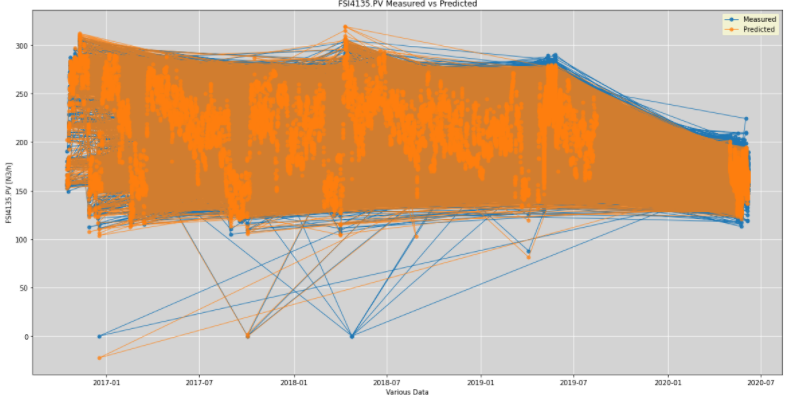

In [51]:
# plot measured value and predicted value
#fig = plt.figure(figsize=(500, 10)) 
fig = plt.figure(figsize=(15, 3))
#plt.plot(x,df_y_trial.values.reshape(-1,1),"-",label="Measured", lw=1, marker='o', markersize=2, markeredgewidth=4)
#plt.plot(x,pred_trial_y_inv,"-",label="Predicted", alpha=0.8, lw=1, marker='o', markersize=2, markeredgewidth=4)
plt.scatter(x,df_y_trial.values.reshape(-1,1),label="Measured", s=5)
plt.scatter(x,pred_trial_y_inv,label="Predicted", s=5)
plt.title('{} Measured vs Predicted'.format(target_col))
plt.xlabel('Various Data')
plt.ylabel(target_col+" "+measure_unit)
plt.legend(loc='best')
plt.grid()

plt.show()
print("trial_score : %.3f" % r2_score(y_true=df_y_trial.values.reshape(-1,1),\
                               y_pred=pred_trial_y_inv))
print('trial_RMSE: %.3f' % np.sqrt(mean_squared_error(y_true=df_y_trial.values.reshape(-1,1),\
                                                y_pred=pred_trial_y_inv)))

## Add by TOKI ===== add Error

In [52]:
np_diff = pred_trial_y_inv - np.array(df_y_trial.values.reshape(-1,1))
color_ = 'firebrick'
fig, axis_lst = create_multi_axis_free([[10,2],[3,2]],[1,1],[0.5,0])
axis1 = axis_lst[0]
axis1.scatter(x,np_diff,s=2,label='diff',color=color_,marker='s')
axis1.set_xlabel('datetime')
axis1.set_ylabel('Error (pred - act)')
axis1.grid(True)
axis1.set_title('{} Prediction Error'.format(target_col))
axis2 = axis_lst[1]
axis2.hist(np_diff,bins=100,orientation='horizontal',color=color_)
axis2.grid(True)
plt.show()

In [53]:
df_diff = pd.DataFrame(np_diff)
df_diff.columns, df_diff.index = ['error'], x
df_diff.describe()

## TOKI Comment
- RMSEやR2 score では見抜けない大きな誤差 (min = -119.973705, max = 189.492828)がある  
  (-There is a large error (min = -119.973705, max = 189.492828) that cannot be seen by RMSE or R2 score.)
- どのタイミングのものか？
  (What timing is it?)

In [54]:
print('# High Error Samples')
error_thres = 50
lst_index = [i for i in range(df_diff.shape[0]) if abs(df_diff.iloc[i,0])>=error_thres]
n_high = len(lst_index)
if (n_high<20):
    for i in range(n_high):
        index_ = lst_index[i]
        print('{} : {} \t {}'.format(i,df_diff.index[index_],df_diff.iloc[index_,0]))
else:
    print('* n of high error : ',n_high)


df_diff_high = df_diff.iloc[lst_index,0]
color_ = 'firebrick'
fig, axis_lst = create_multi_axis_free([[10,2],[3,2]],[1,1],[0.5,0])
axis1 = axis_lst[0]
axis1.scatter(df_diff_high.index,df_diff_high,s=10,label='diff',color=color_,marker='s')
axis1.set_xlabel('datetime')
axis1.set_ylabel('Error (pred - act)')
axis1.grid(True)
axis1.set_title('{} High Prediction Error'.format(target_col))
axis2 = axis_lst[1]
axis2.hist(df_diff_high,bins=100,orientation='horizontal',color=color_)
axis2.grid(True)
plt.show()

### TOKI Comment
- アンサンブルが災いしている？　いずれかのモデルが足を引っ張ってる？ => model 毎に見える化 => 関数化！

In [77]:
def visualize_prediction_error(x,np_act,np_pred,col,measure_unit,error_thres=-9999):
    
    # actual & prediction
    fig = plt.figure(figsize=(15, 2))
    plt.scatter(x,np_act,label="act", s=5)
    plt.scatter(x,np_pred,label="pred", s=5)
    plt.title('{} Act vs Pred'.format(col))
    plt.xlabel('datetime')
    plt.ylabel(col+" "+measure_unit)
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    # prediction error
    np_diff = np_pred - np_act
    color_ = 'firebrick'
    fig, axis_lst = create_multi_axis_free([[10,1.5],[3,1.5]],[1,1],[0.5,0])
    axis1 = axis_lst[0]
    axis1.scatter(x,np_diff,s=2,label='diff',color=color_,marker='s')
    axis1.set_xlabel('datetime')
    axis1.set_ylabel('Error (pred - act)')
    axis1.grid(True)
    axis1.set_title('{} Prediction Error'.format(target_col))
    axis2 = axis_lst[1]
    axis2.hist(np_diff,bins=100,orientation='horizontal',color=color_)
    axis2.grid(True)
    plt.show()

    if (error_thres>=0):
        df_diff = pd.DataFrame(np_diff)
        df_diff.index, df_diff.columns = x, ['error']
        df_diff.sort_index(inplace=True)
        lst_index = [i for i in range(df_diff.shape[0]) if abs(df_diff.iloc[i,0])>=error_thres]
        n_high = len(lst_index)
        if (n_high>0):
            print('# High Error Samples : >= {}\n'.format(error_thres))
            print('i : datetme \t error')
            for i in range(n_high):
                index_ = lst_index[i]
                print('{} : {} \t {}'.format(i,df_diff.index[index_],df_diff.iloc[index_,0]))


In [78]:
#plt.scatter(x,df_y_trial.values.reshape(-1,1),label="Measured", s=5)
#plt.scatter(x,pred_trial_y_inv,label="Predicted", s=5)
#def calc_pred(models,select_model_id,df_x)

np_act = np.array(df_y_trial.values.reshape(-1,1))
for id_ in range(n_k):
    print('\n===== Cross-Validation Model : {}'.format(id_))
    np_pred = calc_pred(models,id_,trial_X_std)
    np_pred_inv = sc_y_train.inverse_transform(X=np_pred)
    visualize_prediction_error(x,np_act,np_pred_inv,target_col,measure_unit,error_thres=50)

## TOKI Comment　* 本ラン時の epoch が小さいので結論付けはできないが... (* I can't conclude because the epoch at the time of this run is small ...)

- 同じタイミングのサンプルで大きなエラーを示している。 (A sample with the same timing shows a big error.)
- これらのタイミングは、同一モデルでは表現できない関係性（説明変数-目的変数）を持っている？ => このタイミングの説明変数値を分析！  
  (Do these timings have a relationship (explanatory variable - objective variable) that cannot be expressed by the same model? => Analyze the explanatory variable values for this timing!)

# Save the model

In [57]:
# select model ID (0, 1, 2, 3)
select_model_id = 3
model = models[select_model_id]
model.save(str(select_model_id) +'_keras_nn_model_FSI4135.h5')

In [58]:
contents = '[1]: models'
pickle_models = [contents,
                 models
                ]

In [59]:
# Error with pickle
with open('models.pkl', mode='wb') as f:
    pickle.dump(pickle_models, f)

In [60]:
# call  keras model
# from keras.models import load_model
# model = load_model('keras_nn_model_fsi4135.h5')

In [61]:
# # models load
# with open('models.pkl', mode='rb') as f:
#     pickle_in = pickle.load(f)
# models = pickle_in[1]
# ensmble_pred = calc_pred(models,-1,trial_X_std_2019_)

In [62]:
def save_all_models(model):
    for each in range(len(models)):
        models[each].save(str(each) + '_nn_each_model_FSI4135_01.h5')
    return

In [63]:
save_all_models(models)